## Titanic task

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline
#import split
from sklearn.model_selection import train_test_split
#import regression 
from sklearn.linear_model import LogisticRegression
#import Random forest
from sklearn.ensemble import RandomForestClassifier
#liner regression
from sklearn.linear_model import LinearRegression
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
#import datasets
gender = pd.read_csv('gender.csv')
#check the head of the datasets
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
#check the shape of the data sets
gender.shape

(418, 2)

In [4]:
#check the columns
gender.columns  

Index(['PassengerId', 'Survived'], dtype='object')

In [5]:
#check the info
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [6]:
#check the null values
gender.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

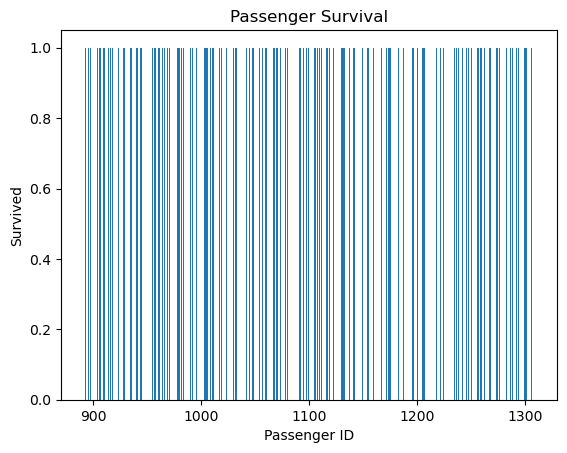

In [9]:
# Extract the required columns
passenger_ids = gender['PassengerId']
survived = gender['Survived']

# Plotting the bar graph
plt.bar(passenger_ids, survived)

# Adding labels and title
plt.xlabel('Passenger ID')
plt.ylabel('Survived')
plt.title('Passenger Survival')

# Display the plot
plt.show()

In [ ]:
#draw a histogram for #Draw a bar graph of Passengers id aganist survived using matplotlib    
# Adding labels and tit#Draw a bar graph of Passengers id aganist survived using matplotlib    
# Adding labels and title
plt.xlabel('Passenger id')

plt.ylabel('Survived')
plt.title('Passenger Survival')

# Display the plot
plt.show() 
plt.xlabel('Passenger id')

plt.ylabel('Survived')
plt.title('Passenger Survival')

# Display the plot
plt.show()